In [23]:
# =============================================================================
# GOOGLE COLAB SETUP / GOOGLE COLAB SETUP
# =============================================================================

# Sjekk om vi kjører i Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("🔧 Kjører i Google Colab - installerer avhengigheter...")
    print("🔧 Running in Google Colab - installing dependencies...")
    
    # Installer nødvendige pakker
    import subprocess
    import sys
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", 
                              "networkx", "matplotlib", "plotly", "pydantic", 
                              "pyyaml", "pandas", "ipywidgets", "pillow", "kaleido"])
        print("✅ Pakker installert")
    except Exception as e:
        print(f"⚠️ Pip install feilet: {e}")
    
    # Fjern eksisterende slektstre-mappe hvis den finnes
    import shutil
    import os
    if os.path.exists('/content/slektstre'):
        shutil.rmtree('/content/slektstre')
        print("🗑️ Fjernet eksisterende slektstre-mappe")
    
    # Klon repository
    try:
        subprocess.check_call(['git', 'clone', 'https://github.com/arvidl/slektstre.git'])
        print("✅ Repository klonet")
    except Exception as e:
        print(f"⚠️ Git clone feilet: {e}")
    
    # Legg til src-mappen til Python path og importer direkte
    sys.path.insert(0, '/content/slektstre/src')
    print("✅ Path lagt til")
    
    # Importer slektstre-modulene direkte for å unngå navnekonflikt
    import importlib.util
    import types
    
    # Først, fjern konfliktende moduler fra sys.modules
    modules_to_remove = ['tree', 'models', 'localization']
    for module_name in modules_to_remove:
        if module_name in sys.modules:
            del sys.modules[module_name]
    
    # Last inn models.py først
    try:
        spec = importlib.util.spec_from_file_location("slektstre_models", "/content/slektstre/src/models.py")
        slektstre_models = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_models)
        
        # Opprett midlertidig models modul
        temp_models_module = types.ModuleType('models')
        temp_models_module.Person = slektstre_models.Person
        temp_models_module.Gender = slektstre_models.Gender
        temp_models_module.Ekteskap = slektstre_models.Ekteskap
        temp_models_module.FamilieData = slektstre_models.FamilieData
        sys.modules['models'] = temp_models_module
        
        print("✅ models.py lastet")
    except Exception as e:
        print(f"⚠️ models.py feilet: {e}")
    
    # Last inn localization.py
    try:
        spec = importlib.util.spec_from_file_location("slektstre_localization", "/content/slektstre/src/localization.py")
        slektstre_localization = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_localization)
        
        # Opprett midlertidig localization modul
        temp_localization_module = types.ModuleType('localization')
        temp_localization_module.t = slektstre_localization.t
        sys.modules['localization'] = temp_localization_module
        
        print("✅ localization.py lastet")
    except Exception as e:
        print(f"⚠️ localization.py feilet: {e}")
    
    # Last inn tree.py som slektstre_tree
    try:
        spec = importlib.util.spec_from_file_location("slektstre_tree", "/content/slektstre/src/tree.py")
        slektstre_tree = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_tree)
        
        # Opprett midlertidig tree modul
        temp_tree_module = types.ModuleType('tree')
        temp_tree_module.Slektstre = slektstre_tree.Slektstre
        sys.modules['tree'] = temp_tree_module
        
        print("✅ tree.py lastet")
    except Exception as e:
        print(f"⚠️ tree.py feilet: {e}")
    
    # Last inn family_io.py
    try:
        spec = importlib.util.spec_from_file_location("slektstre_io", "/content/slektstre/src/family_io.py")
        slektstre_io = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_io)
        print("✅ family_io.py lastet")
    except Exception as e:
        print(f"⚠️ family_io.py feilet: {e}")
    
    # Last inn visualization.py
    try:
        spec = importlib.util.spec_from_file_location("slektstre_viz", "/content/slektstre/src/visualization.py")
        slektstre_viz = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(slektstre_viz)
        print("✅ visualization.py lastet")
    except Exception as e:
        print(f"⚠️ visualization.py feilet: {e}")
    
    print("✅ Slektstre-moduler lastet inn i Colab")
    
except ImportError:
    IN_COLAB = False
    print("💻 Kjører lokalt / Running locally")
    import sys
    sys.path.append('../src')
except Exception as e:
    print(f"⚠️ Colab setup feilet: {e}")
    IN_COLAB = False
    print("💻 Fallback til lokal modus / Fallback to local mode")
    import sys
    sys.path.append('../src')

print(f"📍 Miljø: {'Google Colab' if IN_COLAB else 'Lokal'}")
print(f"📍 Environment: {'Google Colab' if IN_COLAB else 'Local'}")


💻 Kjører lokalt / Running locally
📍 Miljø: Lokal
📍 Environment: Local


In [24]:
# Spill podcast direkte i notebook
import IPython.display as ipd
import os

# Sjekk om podcast-filen finnes og spill den
if IN_COLAB:
    podcast_path = "/content/slektstre/podcast/Slektstre_med_Python_og_Grafteori__Slik_Analyserer_du_Din_Famil.mp3"
else:
    podcast_path = "podcast/Slektstre_med_Python_og_Grafteori__Slik_Analyserer_du_Din_Famil.mp3"

if os.path.exists(podcast_path):
    print("🎧 Spiller podcast: Slektstre med Python og Grafteori")
    print("🎧 Playing podcast: Family Trees with Python and Graph Theory")
    ipd.Audio(podcast_path)
else:
    print("⚠️ Podcast-fil ikke funnet. Last ned fra GitHub repository.")
    print("⚠️ Podcast file not found. Download from GitHub repository.")

⚠️ Podcast-fil ikke funnet. Last ned fra GitHub repository.
⚠️ Podcast file not found. Download from GitHub repository.


# 🌳 Slektstrær og Grafer - En Introduksjon
# 🌳 Family Trees and Graphs - An Introduction

**🇳🇴 Norsk** | **🇬🇧 English**

---

## Velkommen til slektstre-prosjektet! / Welcome to the Family Tree Project!

Denne notebooken gir deg en grundig introduksjon til både slektstrær (genealogi) og grafteori, og hvordan disse to fagområdene kobles sammen i dette prosjektet.

This notebook provides you with a comprehensive introduction to both family trees (genealogy) and graph theory, and how these two fields are connected in this project.

### Hva vil du lære? / What will you learn?

**🇳🇴 Norsk:**
- Hva slektstrær er og hvorfor de er viktige
- Grunnleggende grafteori og hvordan den gjelder for slektstrær
- Praktiske øvelser med både refleksjon og programmering
- Hvordan NetworkX brukes til å bygge og analysere slektstrær

**🇬🇧 English:**
- What family trees are and why they matter
- Basic graph theory and how it applies to family trees
- Practical exercises with both reflection and programming
- How NetworkX is used to build and analyze family trees

### Forutsetninger / Prerequisites

**🇳🇴 Norsk:**
- Grunnleggende Python-kunnskap (anbefalt)
- Ingen forkunnskap om grafteori nødvendig
- Åpenhet for å lære nye konsepter

**🇬🇧 English:**
- Basic Python knowledge (recommended)
- No prior graph theory knowledge required
- Openness to learning new concepts

---


## 📚 Del 1: Hva er slektstrær? / Part 1: What are Family Trees?

### 🇳🇴 Slektstrær - En historisk oversikt

Et **slektstre** (også kalt **stamtre** eller **genealogi**) er en visuell representasjon av slektskap og familierelasjoner. Slektstrær har eksistert i tusenvis av år og har spilt en viktig rolle i menneskelig kultur og historie.

#### Hvorfor er slektstrær viktige?

1. **👨‍👩‍👧‍👦 Personlig identitet**: Hjelper oss å forstå vår egen bakgrunn
2. **📜 Historisk bevaring**: Bevarer familiens historie for fremtidige generasjoner
3. **🧬 Medisinsk informasjon**: Kan gi viktig informasjon om arvelige sykdommer
4. **🌍 Kulturell betydning**: Kobler oss til vår kulturelle og etniske bakgrunn
5. **🔍 Historisk forskning**: Hjelper historikere å forstå befolkningsbevegelser og sosiale strukturer

#### Typer slektstrær

**1. Stamtavle (Pedigree Chart)**
- Viser forfedre til en bestemt person
- Tradisjonell tre-struktur
- Brukes ofte i medisinsk kontekst

**2. Etterkommertre (Descendant Tree)**
- Viser alle etterkommere fra en bestemt forfader
- Nyttig for å se familiens utbredelse

**3. Timeglass-visning (Hourglass Chart)**
- Viser både forfedre og etterkommere
- Fokusperson i midten
- Gir komplett oversikt

**4. Vifte-diagram (Fan Chart)**
- Sirkulær visning av forfedre
- Estetisk tiltalende
- Populær i moderne genealogi-programmer

### 🇬🇧 Family Trees - A Historical Overview

A **family tree** (also called **pedigree** or **genealogy**) is a visual representation of kinship and family relationships. Family trees have existed for thousands of years and have played an important role in human culture and history.

#### Why are family trees important?

1. **👨‍👩‍👧‍👦 Personal identity**: Helps us understand our own background
2. **📜 Historical preservation**: Preserves family history for future generations
3. **🧬 Medical information**: Can provide important information about hereditary diseases
4. **🌍 Cultural significance**: Connects us to our cultural and ethnic background
5. **🔍 Historical research**: Helps historians understand population movements and social structures

#### Types of family trees

**1. Pedigree Chart**
- Shows ancestors of a specific person
- Traditional tree structure
- Often used in medical context

**2. Descendant Tree**
- Shows all descendants from a specific ancestor
- Useful for seeing family spread

**3. Hourglass Chart**
- Shows both ancestors and descendants
- Focus person in the center
- Provides complete overview

**4. Fan Chart**
- Circular view of ancestors
- Aesthetically pleasing
- Popular in modern genealogy software

---


### 🤔 Refleksjonsoppgaver / Reflection Questions

**🇳🇴 Norsk:**
1. Hvilke typer slektskap kjenner du til i din egen familie?
2. Hvor langt tilbake i tid kan du spore din familie?
3. Hvilke historier eller tradisjoner har blitt videreført i din familie?
4. Hvorfor tror du slektstrær er viktige for mennesker?

**🇬🇧 English:**
1. What types of relationships do you know about in your own family?
2. How far back in time can you trace your family?
3. What stories or traditions have been passed down in your family?
4. Why do you think family trees are important to people?

---


## 📊 Del 2: Grunnleggende grafteori / Part 2: Basic Graph Theory

### 🇳🇴 Hva er en graf? / What is a Graph?

En **graf** i matematikk og informatikk er en samling av **noder** (også kalt **hjørner** eller **vertices**) som er koblet sammen med **kanter** (edges). Dette er et kraftig konsept som brukes i mange områder, inkludert slektstrær!

**A **graph** in mathematics and computer science is a collection of **nodes** (also called **vertices**) that are connected by **edges**. This is a powerful concept used in many areas, including family trees!**

#### Grunnleggende begreper / Basic Concepts

**🇳🇴 Norsk:**
- **Node/Hjørne**: Et punkt i grafen (f.eks. en person)
- **Kant**: En linje som kobler to noder (f.eks. en slektsrelasjon)
- **Retnet graf**: Kanter har retning (A → B)
- **Uretnet graf**: Kanter har ingen retning (A ↔ B)
- **Tre**: En spesiell type graf uten sykler

**🇬🇧 English:**
- **Node/Vertex**: A point in the graph (e.g., a person)
- **Edge**: A line connecting two nodes (e.g., a family relationship)
- **Directed graph**: Edges have direction (A → B)
- **Undirected graph**: Edges have no direction (A ↔ B)
- **Tree**: A special type of graph without cycles

### 🇳🇴 Eksempler med NetworkX / Examples with NetworkX

La oss se på noen enkle eksempler:


In [14]:
# Importer nødvendige biblioteker
import networkx as nx
import matplotlib.pyplot as plt
from datetime import date

# Importer slektstre-moduler (fungerer både lokalt og i Colab)
if IN_COLAB:
    # Bruk de modulene vi lastet inn i Colab-setup
    Person = slektstre_models.Person
    Gender = slektstre_models.Gender
    Slektstre = slektstre_tree.Slektstre
    load_from_yaml = slektstre_io.load_from_yaml
else:
    # Lokale imports
    from models import Person, Gender
    from tree import Slektstre
    from family_io import load_from_yaml

print("✅ Biblioteker importert!")
print("✅ Libraries imported!")


✅ Biblioteker importert!
✅ Libraries imported!


🇳🇴 Eksempel 1: Enkel urettet graf
🇬🇧 Example 1: Simple undirected graph


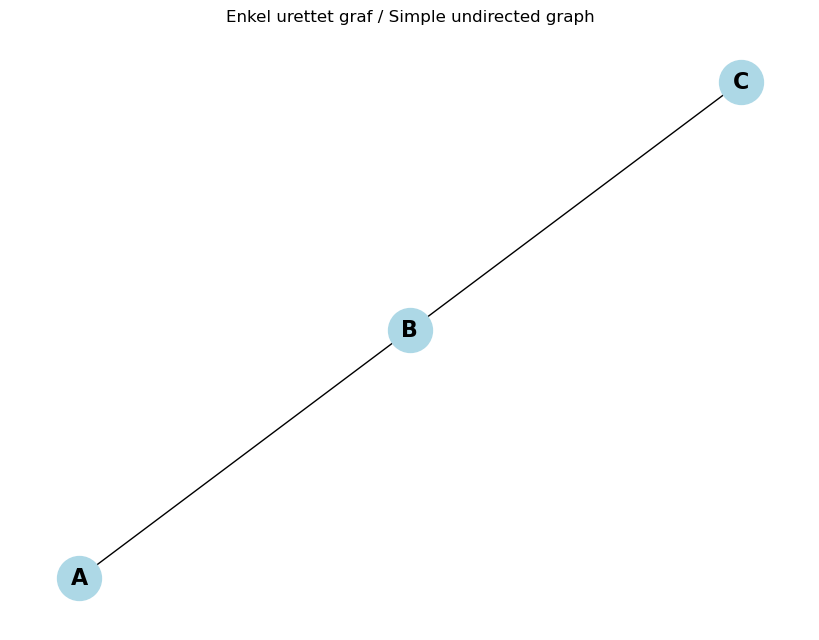

Antall noder: 3
Antall kanter: 2
Number of nodes: 3
Number of edges: 2


In [15]:
# Eksempel 1: Enkel urettet graf / Simple undirected graph
print("🇳🇴 Eksempel 1: Enkel urettet graf")
print("🇬🇧 Example 1: Simple undirected graph")

# Opprett en enkel graf
G = nx.Graph()

# Legg til noder
G.add_node("A", name="Alice")
G.add_node("B", name="Bob")
G.add_node("C", name="Charlie")

# Legg til kanter
G.add_edge("A", "B")
G.add_edge("B", "C")

# Visualiser
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1000, font_size=16, font_weight='bold')
plt.title("Enkel urettet graf / Simple undirected graph")
plt.show()

print(f"Antall noder: {G.number_of_nodes()}")
print(f"Antall kanter: {G.number_of_edges()}")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


🇳🇴 Eksempel 2: Rettet graf
🇬🇧 Example 2: Directed graph


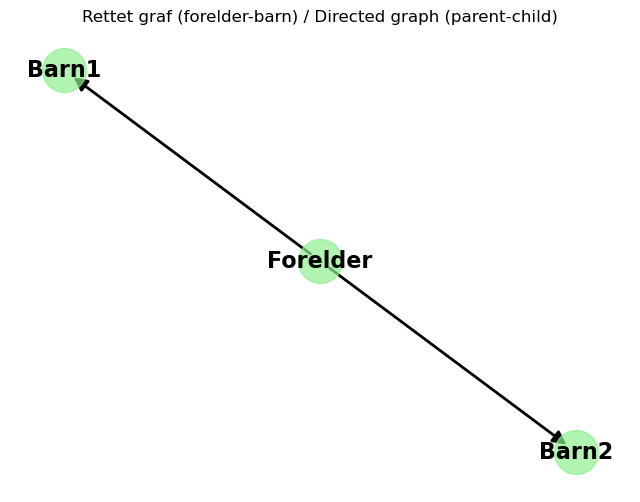

Antall noder: 3
Antall kanter: 2
Number of nodes: 3
Number of edges: 2


In [16]:
# Eksempel 2: Rettet graf / Directed graph
print("🇳🇴 Eksempel 2: Rettet graf")
print("🇬🇧 Example 2: Directed graph")

# Opprett en rettet graf
D = nx.DiGraph()

# Legg til noder
D.add_node("Parent", name="Forelder")
D.add_node("Child1", name="Barn1")
D.add_node("Child2", name="Barn2")

# Legg til rettede kanter (forelder → barn)
D.add_edge("Parent", "Child1")
D.add_edge("Parent", "Child2")

# Visualiser
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(D)

# Tegn noder
nx.draw_networkx_nodes(D, pos, node_color='lightgreen', 
                       node_size=1000, alpha=0.7)

# Tegn kanter
nx.draw_networkx_edges(D, pos, arrows=True, arrowsize=20, 
                       edge_color='black', width=2)

# Legg til etiketter med norske navn
labels = {node: D.nodes[node]['name'] for node in D.nodes()}
nx.draw_networkx_labels(D, pos, labels, font_size=16, font_weight='bold')

plt.title("Rettet graf (forelder-barn) / Directed graph (parent-child)")
plt.axis('off')
plt.show()

print(f"Antall noder: {D.number_of_nodes()}")
print(f"Antall kanter: {D.number_of_edges()}")
print(f"Number of nodes: {D.number_of_nodes()}")
print(f"Number of edges: {D.number_of_edges()}")


### 🇳🇴 Spesielle typer grafer / Special Types of Graphs

#### 1. Tre (Tree)
Et **tre** er en spesiell type graf som:
- Har ingen sykler (ikke kan gå i sirkel)
- Er sammenkoblet (alle noder kan nås fra hverandre)
- Har nøyaktig n-1 kanter for n noder

**A **tree** is a special type of graph that:**
- Has no cycles (cannot go in circles)
- Is connected (all nodes can be reached from each other)
- Has exactly n-1 edges for n nodes

#### 2. Sykler (Cycles)
En **sykel** er når du kan gå fra en node og komme tilbake til samme node.
I slektstrær vil dette være umulig (en person kan ikke være sin egen forfader).

**A **cycle** is when you can go from a node and return to the same node.**
**In family trees this would be impossible (a person cannot be their own ancestor).**

#### 3. Grad (Degree)
**Grad** er antall kanter som er koblet til en node:
- **Inngrad**: Antall kanter som kommer inn til noden
- **Utgrad**: Antall kanter som går ut fra noden

**Degree** is the number of edges connected to a node:**
- **In-degree**: Number of edges coming into the node
- **Out-degree**: Number of edges going out from the node


🇳🇴 Eksempel 3: Tre vs. Graf med sykler
🇬🇧 Example 3: Tree vs. Graph with cycles


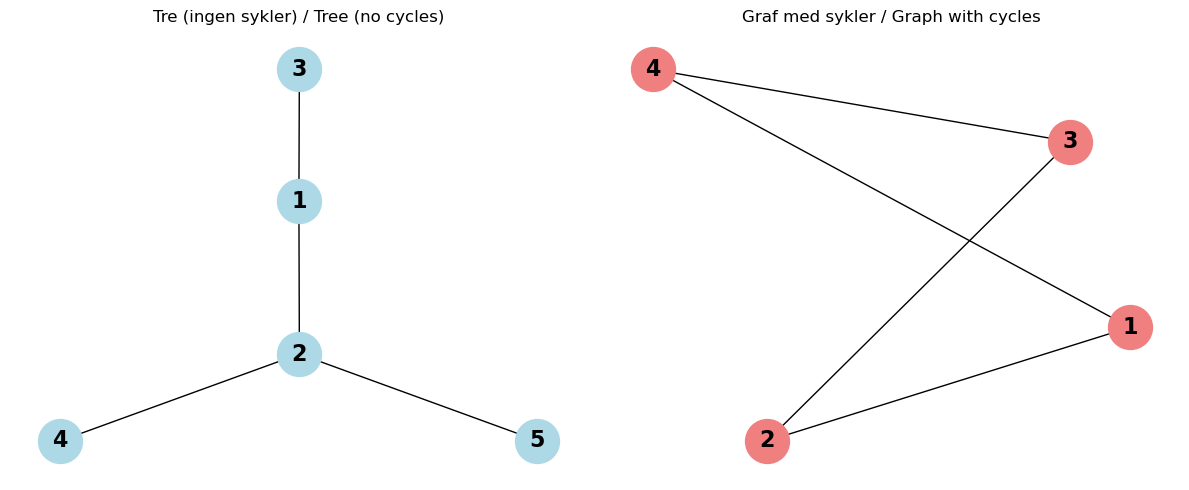

Tre - Er tre: True
Sykelgraf - Er tre: False
Tree - Is tree: True
Cycle graph - Is tree: False


In [17]:
# Eksempel 3: Tre vs. Graf med sykler / Tree vs. Graph with cycles
print("🇳🇴 Eksempel 3: Tre vs. Graf med sykler")
print("🇬🇧 Example 3: Tree vs. Graph with cycles")

# Opprett et tre
tree = nx.Graph()
tree.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5)])

# Opprett en graf med sykler
cycle_graph = nx.Graph()
cycle_graph.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Tegn treet
pos1 = nx.spring_layout(tree)
nx.draw(tree, pos1, with_labels=True, node_color='lightblue', 
        node_size=1000, font_size=16, font_weight='bold', ax=ax1)
ax1.set_title("Tre (ingen sykler) / Tree (no cycles)")

# Tegn grafen med sykler
pos2 = nx.spring_layout(cycle_graph)
nx.draw(cycle_graph, pos2, with_labels=True, node_color='lightcoral', 
        node_size=1000, font_size=16, font_weight='bold', ax=ax2)
ax2.set_title("Graf med sykler / Graph with cycles")

plt.tight_layout()
plt.show()

print(f"Tre - Er tre: {nx.is_tree(tree)}")
print(f"Sykelgraf - Er tre: {nx.is_tree(cycle_graph)}")
print(f"Tree - Is tree: {nx.is_tree(tree)}")
print(f"Cycle graph - Is tree: {nx.is_tree(cycle_graph)}")


---

## 🔗 Del 3: Slektstrær SOM grafer / Part 3: Family Trees AS Graphs

### 🇳🇴 Kobling mellom slektstrær og grafteori / Connection between Family Trees and Graph Theory

Nå skal vi se hvordan slektstrær kan representeres som grafer:

**Now we'll see how family trees can be represented as graphs:**

#### Mapping / Kartlegging

| Slektstre / Family Tree | Graf / Graph |
|-------------------------|--------------|
| Person / Person | Node / Node |
| Slektsrelasjon / Family relationship | Kant / Edge |
| Forelder-barn / Parent-child | Retnet kant / Directed edge |
| Ekteskap / Marriage | Uretnet kant / Undirected edge |
| Generasjon / Generation | Avstand fra rot / Distance from root |
| Slektskap / Kinship | Sti mellom noder / Path between nodes |

#### Hvorfor NetworkX er perfekt for slektstrær / Why NetworkX is perfect for family trees

1. **🔧 Kraftige algoritmer**: NetworkX har innebygde algoritmer for å finne stier, beregne avstander, og analysere grafer
2. **📊 Visualisering**: Enkelt å lage visuelle representasjoner
3. **🔄 Fleksibilitet**: Støtter både rettede og ikke-rettede grafer
4. **📈 Skalerbarhet**: Kan håndtere store slektstrær
5. **🔍 Analyse**: Kan beregne komplekse slektskap automatisk

English:
1. **🔧 Powerful algorithms**: NetworkX has built-in algorithms for finding paths, calculating distances, and analyzing graphs
2. **📊 Visualization**: Easy to create visual representations
3. **🔄 Flexibility**: Supports both directed and undirected graphs
4. **📈 Scalability**: Can handle large family trees
5. **🔍 Analysis**: Can calculate complex relationships automatically


🇳🇴 Eksempel 4: Bygg et enkelt slektstre som graf
🇬🇧 Example 4: Build a simple family tree as graph


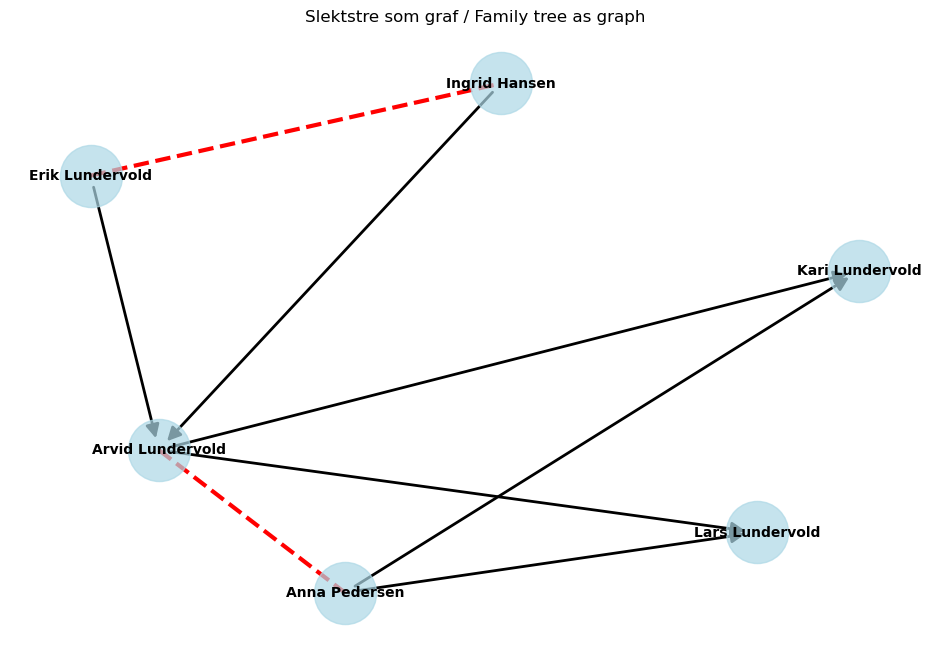

Antall personer: 6
Antall relasjoner: 8
Number of people: 6
Number of relationships: 8


In [18]:
# Eksempel 4: Bygg et enkelt slektstre som graf / Build a simple family tree as graph
print("🇳🇴 Eksempel 4: Bygg et enkelt slektstre som graf")
print("🇬🇧 Example 4: Build a simple family tree as graph")

# Opprett et retnet graf for slektstreet
family_graph = nx.DiGraph()

# Legg til personer som noder
family_graph.add_node("Bestefar", name="Erik Lundervold", generation=1)
family_graph.add_node("Bestemor", name="Ingrid Hansen", generation=1)
family_graph.add_node("Far", name="Arvid Lundervold", generation=2)
family_graph.add_node("Mor", name="Anna Pedersen", generation=2)
family_graph.add_node("Barn1", name="Lars Lundervold", generation=3)
family_graph.add_node("Barn2", name="Kari Lundervold", generation=3)

# Legg til forelder-barn relasjoner (retnede kanter)
family_graph.add_edge("Bestefar", "Far", relation="parent-child")
family_graph.add_edge("Bestemor", "Far", relation="parent-child")
family_graph.add_edge("Far", "Barn1", relation="parent-child")
family_graph.add_edge("Far", "Barn2", relation="parent-child")
family_graph.add_edge("Mor", "Barn1", relation="parent-child")
family_graph.add_edge("Mor", "Barn2", relation="parent-child")

# Legg til ekteskap (uretnede kanter)
family_graph.add_edge("Bestefar", "Bestemor", relation="marriage")
family_graph.add_edge("Far", "Mor", relation="marriage")

# Visualiser
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(family_graph, k=3, iterations=50)

# Tegn noder
nx.draw_networkx_nodes(family_graph, pos, node_color='lightblue', 
                       node_size=2000, alpha=0.7)

# Tegn kanter med forskjellige farger
parent_child_edges = [(u, v) for u, v, d in family_graph.edges(data=True) 
                      if d.get('relation') == 'parent-child']
marriage_edges = [(u, v) for u, v, d in family_graph.edges(data=True) 
                  if d.get('relation') == 'marriage']

nx.draw_networkx_edges(family_graph, pos, edgelist=parent_child_edges, 
                       edge_color='black', arrows=True, arrowsize=20, width=2)
nx.draw_networkx_edges(family_graph, pos, edgelist=marriage_edges, 
                       edge_color='red', arrows=False, width=3, style='dashed')

# Legg til etiketter
labels = {node: family_graph.nodes[node]['name'] for node in family_graph.nodes()}
nx.draw_networkx_labels(family_graph, pos, labels, font_size=10, font_weight='bold')

plt.title("Slektstre som graf / Family tree as graph")
plt.axis('off')
plt.show()

print(f"Antall personer: {family_graph.number_of_nodes()}")
print(f"Antall relasjoner: {family_graph.number_of_edges()}")
print(f"Number of people: {family_graph.number_of_nodes()}")
print(f"Number of relationships: {family_graph.number_of_edges()}")


---

## 🎯 Del 4: Praktiske øvelser / Part 4: Practical Exercises

### 🇳🇴 Refleksjonsoppgaver / Reflection Questions

**1. Slektskap og grafer / Kinship and graphs**
- Hvilke typer grafer vil du bruke for å representere forskjellige slektsrelasjoner?
- What types of graphs would you use to represent different family relationships?

**2. Sykler i slektstrær / Cycles in family trees**
- Kan du tenke deg situasjoner hvor slektstrær kunne få sykler?
- Can you think of situations where family trees could have cycles?

**3. Kompleksitet / Complexity**
- Hvorfor blir slektstrær mer komplekse jo lenger tilbake i tid du går?
- Why do family trees become more complex the further back in time you go?

### 🇳🇴 Programmeringsoppgaver / Programming Exercises

**Oppgave 1: Bygg et 3-personers slektstre / Exercise 1: Build a 3-person family tree**

Bygg et enkelt slektstre med 3 personer og visualiser det.

**Build a simple family tree with 3 people and visualize it.**


🇳🇴 Løsning til Oppgave 1 / Solution to Exercise 1
🇬🇧 Solution to Exercise 1


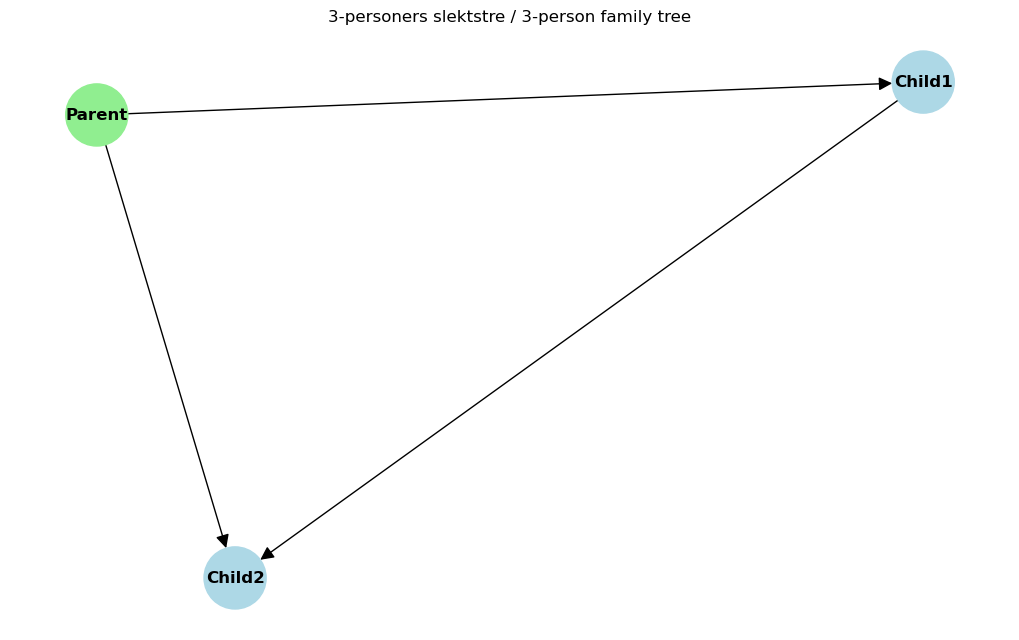

Antall personer: 3
Antall relasjoner: 3
Number of people: 3
Number of relationships: 3


In [10]:
# LØSNING / SOLUTION
print("🇳🇴 Løsning til Oppgave 1 / Solution to Exercise 1")
print("🇬🇧 Solution to Exercise 1")

# Opprett et tomt slektstre
exercise_tree = nx.DiGraph()

# Legg til 3 personer
exercise_tree.add_node("Parent", name="Parent Person", role="parent")
exercise_tree.add_node("Child1", name="First Child", role="child")
exercise_tree.add_node("Child2", name="Second Child", role="child")

# Legg til relasjoner
exercise_tree.add_edge("Parent", "Child1", relation="parent-child")
exercise_tree.add_edge("Parent", "Child2", relation="parent-child")
exercise_tree.add_edge("Child1", "Child2", relation="siblings")

# Visualiser
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(exercise_tree, k=2)

# Tegn noder med forskjellige farger basert på rolle
node_colors = ['lightgreen' if exercise_tree.nodes[node]['role'] == 'parent' 
                else 'lightblue' for node in exercise_tree.nodes()]

nx.draw(exercise_tree, pos, with_labels=True, node_color=node_colors,
        node_size=2000, font_size=12, font_weight='bold',
        arrows=True, arrowsize=20)

plt.title("3-personers slektstre / 3-person family tree")
plt.show()

print(f"Antall personer: {exercise_tree.number_of_nodes()}")
print(f"Antall relasjoner: {exercise_tree.number_of_edges()}")
print(f"Number of people: {exercise_tree.number_of_nodes()}")
print(f"Number of relationships: {exercise_tree.number_of_edges()}")


**Oppgave 2: Finn stier mellom familiemedlemmer / Exercise 2: Find paths between family members**

Bruk NetworkX til å finne alle mulige stier mellom to personer i et slektstre.

**Use NetworkX to find all possible paths between two people in a family tree.**


In [19]:
# LØSNING / SOLUTION
print("🇳🇴 Løsning til Oppgave 2 / Solution to Exercise 2")
print("🇬🇧 Solution to Exercise 2")

def find_all_paths(graph, start, end, max_length=5):
    """Finn alle stier mellom to noder i en retnet graf."""
    try:
        # Bruk NetworkX for å finne alle enkle stier
        paths = list(nx.all_simple_paths(graph, start, end, cutoff=max_length))
        return paths
    except nx.NetworkXNoPath:
        return []

# Test med vårt familiegraf
start_person = "Bestefar"
end_person = "Barn1"

paths = find_all_paths(family_graph, start_person, end_person)

print(f"Stier fra {family_graph.nodes[start_person]['name']} til {family_graph.nodes[end_person]['name']}:")
print(f"Paths from {family_graph.nodes[start_person]['name']} to {family_graph.nodes[end_person]['name']}:")

for i, path in enumerate(paths, 1):
    path_names = [family_graph.nodes[node]['name'] for node in path]
    print(f"  {i}. {' → '.join(path_names)}")

if not paths:
    print("  Ingen stier funnet / No paths found")

# Finn også korteste sti
try:
    shortest_path = nx.shortest_path(family_graph, start_person, end_person)
    shortest_names = [family_graph.nodes[node]['name'] for node in shortest_path]
    print(f"\nKorteste sti: {' → '.join(shortest_names)}")
    print(f"Shortest path: {' → '.join(shortest_names)}")
except nx.NetworkXNoPath:
    print("\nIngen sti funnet / No path found")


🇳🇴 Løsning til Oppgave 2 / Solution to Exercise 2
🇬🇧 Solution to Exercise 2
Stier fra Erik Lundervold til Lars Lundervold:
Paths from Erik Lundervold to Lars Lundervold:
  1. Erik Lundervold → Arvid Lundervold → Lars Lundervold
  2. Erik Lundervold → Arvid Lundervold → Anna Pedersen → Lars Lundervold
  3. Erik Lundervold → Ingrid Hansen → Arvid Lundervold → Lars Lundervold
  4. Erik Lundervold → Ingrid Hansen → Arvid Lundervold → Anna Pedersen → Lars Lundervold

Korteste sti: Erik Lundervold → Arvid Lundervold → Lars Lundervold
Shortest path: Erik Lundervold → Arvid Lundervold → Lars Lundervold


---

## 🚀 Del 5: Praktiske anvendelser / Part 5: Practical Applications

### 🇳🇴 Hvordan slektstre-prosjektet bruker NetworkX / How the family tree project uses NetworkX

La oss se på hvordan det ekte slektstre-prosjektet bruker NetworkX:

**Let's see how the real family tree project uses NetworkX:**


In [20]:
# Last inn eksempel-familien og vis hvordan Slektstre-klassen bruker NetworkX
print("🇳🇴 Hvordan Slektstre-klassen bruker NetworkX")
print("🇬🇧 How the Slektstre class uses NetworkX")

# Last inn eksempel-familien
from family_io import load_from_yaml

familie_data = load_from_yaml('../data/eksempel_familie.yaml')
slektstre = Slektstre(familie_data)

print(f"\nFamilie lastet med {len(familie_data.personer)} personer og {len(familie_data.ekteskap)} ekteskap")
print(f"Family loaded with {len(familie_data.personer)} people and {len(familie_data.ekteskap)} marriages")

# Vis hvordan grafen brukes internt
print(f"\nInternt graf-objekt / Internal graph object:")
print(f"  Type: {type(slektstre.graph)}")
print(f"  Antall noder: {slektstre.graph.number_of_nodes()}")
print(f"  Number of nodes: {slektstre.graph.number_of_nodes()}")
print(f"  Antall kanter: {slektstre.graph.number_of_edges()}")
print(f"  Number of edges: {slektstre.graph.number_of_edges()}")

# Vis nodetyper
person_nodes = [node for node, data in slektstre.graph.nodes(data=True) 
                if data.get('type') == 'person']
marriage_nodes = [node for node, data in slektstre.graph.nodes(data=True) 
                  if data.get('type') == 'marriage']

print(f"\nNodetyper / Node types:")
print(f"  Personer: {len(person_nodes)}")
print(f"  People: {len(person_nodes)}")
print(f"  Ekteskap: {len(marriage_nodes)}")
print(f"  Marriages: {len(marriage_nodes)}")

# Vis kanttyper
edge_types = {}
for u, v, data in slektstre.graph.edges(data=True):
    relation = data.get('relation', 'unknown')
    edge_types[relation] = edge_types.get(relation, 0) + 1

print(f"\nKanttyper / Edge types:")
for relation, count in edge_types.items():
    print(f"  {relation}: {count}")

# Vis statistikk
print(f"\n📊 Statistikk / Statistics:")
stats = slektstre.get_statistics()
print(f"  Totalt antall personer: {stats['total_persons']}")
print(f"  Total number of people: {stats['total_persons']}")
print(f"  Antall generasjoner: {stats['max_generation'] + 1}")
print(f"  Number of generations: {stats['max_generation'] + 1}")
print(f"  Gjennomsnittsalder: {stats['average_age']} år")
print(f"  Average age: {stats['average_age']} years")


🇳🇴 Hvordan Slektstre-klassen bruker NetworkX
🇬🇧 How the Slektstre class uses NetworkX

Familie lastet med 17 personer og 5 ekteskap
Family loaded with 17 people and 5 marriages

Internt graf-objekt / Internal graph object:
  Type: <class 'networkx.classes.digraph.DiGraph'>
  Antall noder: 22
  Number of nodes: 22
  Antall kanter: 46
  Number of edges: 46

Nodetyper / Node types:
  Personer: 17
  People: 17
  Ekteskap: 5
  Marriages: 5

Kanttyper / Edge types:
  partner: 20
  parent-child: 26

📊 Statistikk / Statistics:
  Totalt antall personer: 17
  Total number of people: 17
  Antall generasjoner: 3
  Number of generations: 3
  Gjennomsnittsalder: 49.2 år
  Average age: 49.2 years


---

## 📚 Del 6: Oppsummering og neste steg / Part 6: Summary and Next Steps

### 🇳🇴 Hva har du lært? / What have you learned?

I denne notebooken har du lært:

**In this notebook you have learned:**

1. **🌳 Slektstrær**: Hva de er, hvorfor de er viktige, og forskjellige typer
2. **📊 Grafteori**: Grunnleggende konsepter som noder, kanter, og treer
3. **🔗 Kobling**: Hvordan slektstrær kan representeres som grafer
4. **💻 Praksis**: Hvordan bruke NetworkX til å bygge og analysere slektstrær
5. **🎯 Øvelser**: Både refleksjon og programmering for å forstå begrepene

English:
1. **🌳 Family trees**: What they are, why they're important, and different types
2. **📊 Graph theory**: Basic concepts like nodes, edges, and trees
3. **🔗 Connection**: How family trees can be represented as graphs
4. **💻 Practice**: How to use NetworkX to build and analyze family trees
5. **🎯 Exercises**: Both reflection and programming to understand the concepts

### 🇳🇴 Ordliste / Vocabulary

| Norsk | English | Grafteori | Forklaring |
|-------|---------|-----------|------------|
| Slektstre | Family tree | Tree | Spesiell type graf uten sykler |
| Person | Person | Node/Vertex | Et punkt i grafen |
| Slektsrelasjon | Family relationship | Edge | Linje mellom to noder |
| Forelder | Parent | - | Person som har barn |
| Barn | Child | - | Person som har foreldre |
| Generasjon | Generation | Distance | Avstand fra rot |
| Slektskap | Kinship | Path | Sti mellom to noder |
| Sykel | Cycle | Cycle | Sti som går i sirkel |
| Sammenheng | Connectivity | Connected | Alle noder kan nås |
| Komponent | Component | Component | Sammenhengende del av graf |

### 🇳🇴 Neste steg / Next Steps

Nå som du har lært grunnleggende konsepter, kan du gå videre til:

**Now that you've learned the basic concepts, you can move on to:**

1. **📖 [01_introduksjon.ipynb](01_introduksjon.ipynb)** - Oversikt over slektstre-prosjektet
2. **🔨 [02_bygg_tre_manuelt.ipynb](02_bygg_tre_manuelt.ipynb)** - Bygge slektstrær programmatisk
3. **📁 [03_importer_data.ipynb](03_importer_data.ipynb)** - Import og eksport av data
4. **🎨 [04_visualisering.ipynb](04_visualisering.ipynb)** - Avanserte visualiseringer
5. **🌐 [05_eksterne_databaser.ipynb](05_eksterne_databaser.ipynb)** - Integrasjon med eksterne databaser

### 🇳🇴 Videre lesing / Further Reading

**Grafteori / Graph Theory:**
- [NetworkX Documentation](https://networkx.org/documentation/stable/)
- [Introduction to Graph Theory](https://en.wikipedia.org/wiki/Graph_theory)
- [Graph Theory Tutorial](https://www.tutorialspoint.com/graph_theory/)

**Genealogi / Genealogy:**
- [FamilySearch](https://www.familysearch.org/) - Verdens største genealogi-database
- [Digitalarkivet](https://www.digitalarkivet.no/) - Norske historiske kilder
- [Ancestry.com](https://www.ancestry.com/) - Kommersiell genealogi-tjeneste

### 🇳🇴 Takk for at du leste! / Thank you for reading!

Vi håper denne introduksjonen har gitt deg en god forståelse av både slektstrær og grafteori, og hvordan de kobles sammen i dette prosjektet.

**We hope this introduction has given you a good understanding of both family trees and graph theory, and how they are connected in this project.**

Lykke til med ditt eget slektstre-prosjekt! 🎉

**Good luck with your own family tree project! 🎉**

---

*Denne notebooken er en del av slektstre-prosjektet. Se [README.md](../README.md) for mer informasjon.*

*This notebook is part of the family tree project. See [README.md](../README.md) for more information.*
